# Charlene Bui - ANOP 203 Final Project

### <center> <font color="#003865">Profitability Ratios from 2019-2023 <br><img src="https://wallpapercave.com/wp/wp2446263.jpg" style="height:300px">


Profitability ratios are financial indicators employed by analysts and investors to assess a company's capacity to generate income (profit) in relation to factors such as revenue, assets on the balance sheet, operating costs, and shareholders' equity over a specified timeframe. These ratios provide insights into how effectively a company utilizes its assets to create profit and deliver value to its shareholders.

In this project, we will be looking at 7 ratios and their comparisons which are: Earnings before income and taxes, Earnings before income, taxes, depreciation and amortization, Return on Asset, Return on Equity, Net Profit Margin, Gross Profit Margin and Earnings per Shares. 

### <font color="#003865"> Please enjoy this song while looking through my notebook!

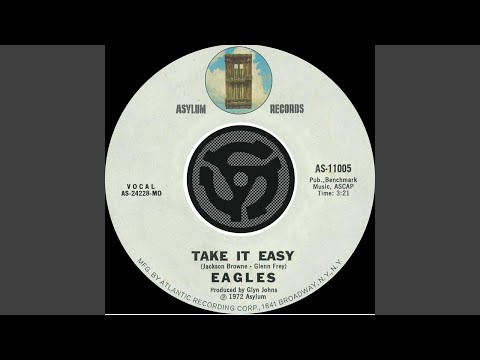

In [117]:
from IPython.display import YouTubeVideo

YouTubeVideo('s0ZZHNRHA2g')

In [113]:
# Import data from yahoo finance
import yfinance as yf
import os
import pandas as pd

# Download matplotlib
!pip install matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [83]:
#User input amount of companies want to compare
while True:
    try:
        amount = int(input('Please enter the amount of companies you want: '))
        break
    except ValueError:
        print('Please enter the amount again')
        continue
        

#Dictionaries for financial statements    
tickers_list=[]
IS={}
BS={}
CF={}

for i in range(amount):
    ticker = input()
    tickers_list.append(ticker)


for ticker in tickers_list:
    #Taking tickers' info from yahoo finance
    ticker_info = yf.Ticker(ticker)
    
    #Income Statement Info
    fin_IS = ticker_info.financials
    IS[ticker] = pd.DataFrame(fin_IS)

    #Balance Sheet Info
    fin_BS = ticker_info.balance_sheet
    BS[ticker] = pd.DataFrame(fin_BS)

    #Cash Flow Info
    fin_CF = ticker_info.cash_flow
    CF[ticker] = pd.DataFrame(fin_CF)

    # Display settings
    pd.set_option('display.max_rows', None) 

#Change columns' names for the dataframe created above
    try:
            new_column_names = ['2023','2022','2021','2020']
            IS[ticker].columns = new_column_names
            BS[ticker].columns = new_column_names
            CF[ticker].columns = new_column_names

    except ValueError:
            print('One of your company is still too new to have enough historical data to be compared')

Please enter the amount of companies you want: 4
AMZN
WMT
ORCL
CRM


In [84]:
# Earnings before income and taxes comparison table
column=['2023','2022','2021','2020']
EBIT=pd.DataFrame(columns=column,index = IS.keys())
for ticker in tickers_list:
    for year in column:
        EBIT.at[ticker,year] = IS[ticker].loc['EBIT',year]
EBIT 

,2023,2022,2021,2020
AMZN,-3569000000.0,39960000000.0,25825000000.0,15576000000.0
WMT,19144000000.0,20690000000.0,22879000000.0,22715000000.0
ORCL,12631000000.0,10404000000.0,15495000000.0,14058000000.0
CRM,1858000000.0,548000000.0,455000000.0,463000000.0


<Axes: >

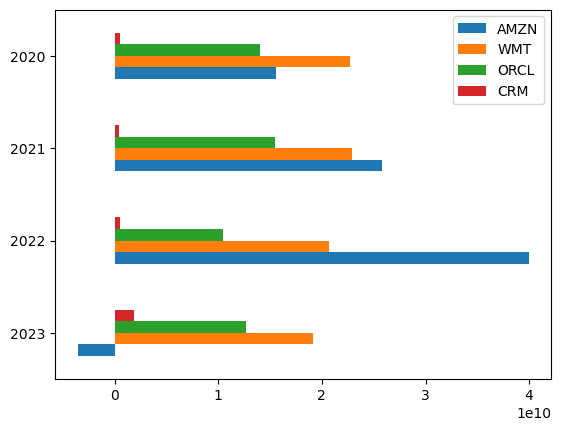

In [107]:
# EBIT comparison plot
EBIT.transpose().plot.barh()

In [86]:
# Earnings before income, taxes, depreciation and amortization comparison table
column=['2023','2022','2021','2020']
EBITDA=pd.DataFrame(columns=column,index = IS.keys())
for ticker in tickers_list:
    for year in column:
        EBITDA.at[ticker,year] = IS[ticker].loc['EBITDA',year]
EBITDA 

,2023,2022,2021,2020
AMZN,38352000000.0,74256000000.0,51076000000.0,37365000000.0
WMT,30089000000.0,31348000000.0,34031000000.0,33702000000.0
ORCL,18739000000.0,13526000000.0,18411000000.0,17026000000.0
CRM,5644000000.0,3846000000.0,3301000000.0,2598000000.0


<Axes: >

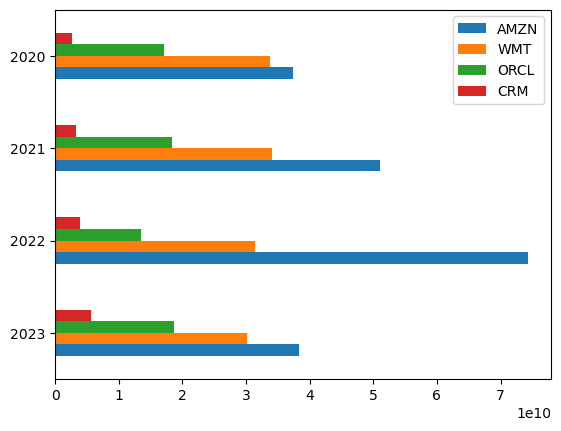

In [106]:
# EBITDA comparison plot
EBITDA.transpose().plot.barh()

In [88]:
#Return on Asset comparison table
column_withavg=[2023,2022,2021]
ROA=pd.DataFrame(index=IS.keys())

for ticker in tickers_list:
    for year in column_withavg:
            ROA.at[ticker,str(year)] = EBIT.loc[ticker,str(year)]/((BS[ticker].loc['Total Assets',str(year)]+BS[ticker].loc['Total Assets',str(year-1)])/2)       

ROA

,2023,2022,2021
AMZN,-0.008082,0.107746,0.094520
WMT,0.078408,0.083200,0.093576
ORCL,0.103668,0.086554,0.125697
CRM,0.019149,0.006786,0.007494


<Axes: >

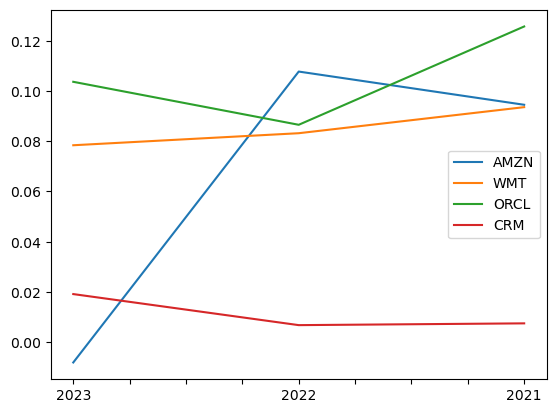

In [89]:
# ROA comparison plot
ROA.transpose().plot.line()

In [90]:
#Return on Equity comparison table
column_withavg=[2023,2022,2021]
ROE=pd.DataFrame(index=IS.keys())

for ticker in tickers_list:
    for year in column_withavg:
            ROE.at[ticker,str(year)] = IS[ticker].loc['Net Income',str(year)]/((BS[ticker].loc['Stockholders Equity',str(year)]+BS[ticker].loc['Stockholders Equity',str(year-1)])/2)       

ROE

,2023,2022,2021
AMZN,-0.019150,0.288056,0.274417
WMT,0.146049,0.166186,0.173242
ORCL,-4.037512,73.010870,1.472602
CRM,0.003571,0.028989,0.108042


<Axes: >

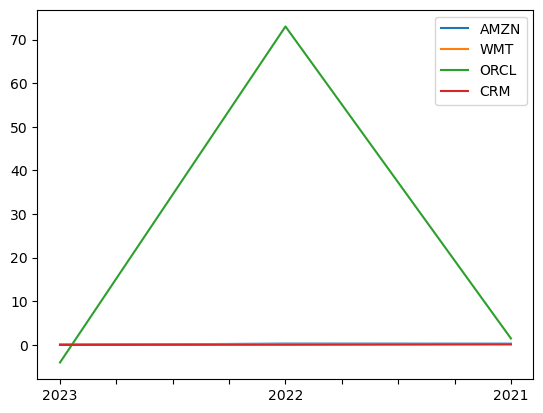

In [110]:
# Return on Equity comparison plot
ROE.transpose().plot.line()

In [92]:
# Net Profit Margin comparison table
column=['2023','2022','2021','2020']
NPM=pd.DataFrame(columns=column,index=IS.keys())
for ticker in tickers_list:
    for year in column:
            NPM.at[ticker,year] = IS[ticker].loc['Net Income',year]/IS[ticker].loc['Total Revenue',year]
NPM

,2023,2022,2021,2020
AMZN,-0.005296,0.071014,0.055252,0.041309
WMT,0.019107,0.023872,0.024162,0.028401
ORCL,0.170217,0.15827,0.339583,0.259419
CRM,0.006634,0.054507,0.191605,0.007369


<Axes: >

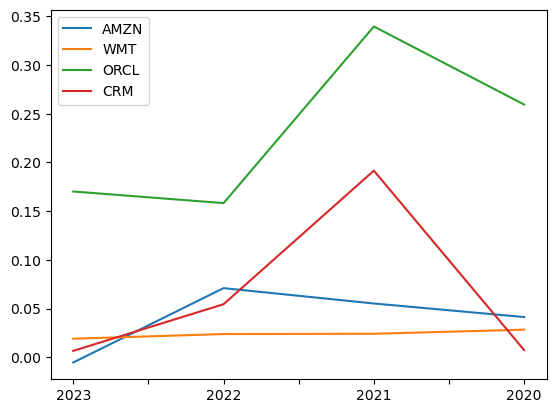

In [93]:
# Net Profit Margin comparison plot
NPM.transpose().plot.line()

In [102]:
# Gross Profit Margin comparison table
GPM=pd.DataFrame(index=IS.keys())
for ticker in tickers_list:
    for year in column:
            GPM.at[ticker,year] = IS[ticker].loc['Gross Profit',year]/IS[ticker].loc['Total Revenue',year]
GPM

,2023,2022,2021,2020
AMZN,0.131600,0.141149,0.133398,0.138396
WMT,0.241405,0.250987,0.248298,0.246885
ORCL,0.728470,0.790834,0.805949,0.796816
CRM,0.733350,0.734788,0.744118,0.752310


<Axes: >

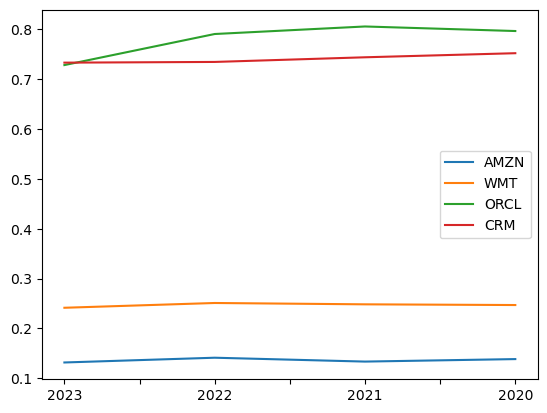

In [95]:
# GPM comparison plot
GPM.transpose().plot.line()

In [99]:
#Earnings per Share comparison table
EPS=pd.DataFrame(index=IS.keys())
for ticker in tickers_list:
    for year in column:
            EPS.at[ticker,year] = IS[ticker].loc['Basic EPS',year]
EPS

,2023,2022,2021,2020
AMZN,-0.27,3.298,2.132,1.173
WMT,4.29,4.900,4.770,5.220
ORCL,3.15,2.490,4.670,3.160
CRM,0.21,1.510,4.480,0.150


<Axes: >

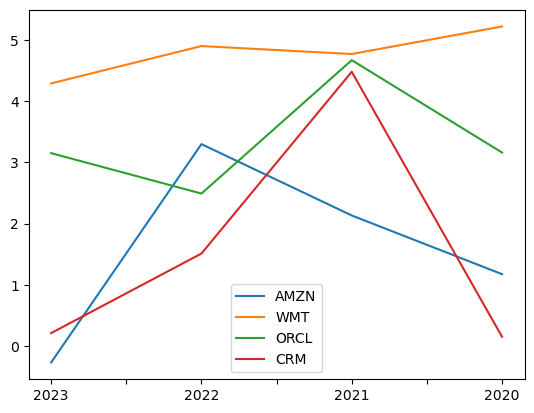

In [103]:
# EPS comparison plot
EPS.transpose().plot.line()

### <font color="#003865">Thank you for watching! <br><img src="https://static.vecteezy.com/system/resources/previews/008/288/960/original/thank-you-in-portuguese-translation-thank-you-free-vector.jpg" style="height:300px">